<a href="https://colab.research.google.com/github/dilakuyucu7/DSA210-Fall24-Flashcards-Project/blob/main/hypothesis_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this file is for hypothesis testing
#my first hypothesis is:
#null hypothesis: The average accuracy level for verbs is equal to that for nouns.
#alternating hypothesis: The average accuracy level for verbs is higher than that for nouns.

In [ ]:
#The box plot clearly shows that nouns have a higher median and tighter accuracy distribution.
#Nouns reach 100% accuracy more frequently compared to verbs.
#The spread for verbs is wider, with lower accuracy values appearing more often.
#Mean Accuracy for Verbs: 0.82
#Mean Accuracy for Nouns: 0.88

T-statistic: -4.4538
P-value: 9.3082e-06
✅ Reject the null hypothesis: There is a significant difference between verbs and nouns accuracy.


<ipython-input-5-139fbfe0e55a>:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([verbs, nouns], labels=['Verbs', 'Nouns'])


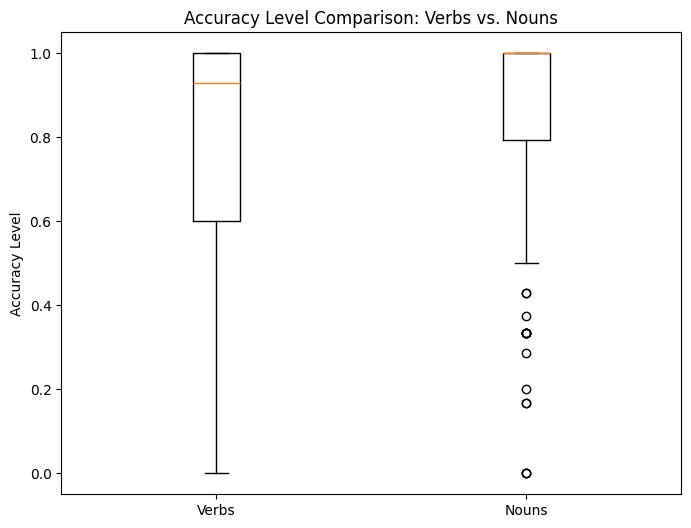

Descriptive Statistics for Verbs:
 count    482.000000
mean       0.816861
std        0.236168
min        0.000000
25%        0.600000
50%        0.928571
75%        1.000000
max        1.000000
Name: accuracy_level, dtype: float64

Descriptive Statistics for Nouns:
 count    607.000000
mean       0.875008
std        0.194603
min        0.000000
25%        0.792857
50%        1.000000
75%        1.000000
max        1.000000
Name: accuracy_level, dtype: float64

Mean Accuracy for Verbs: 0.8169
Mean Accuracy for Nouns: 0.8750


In [5]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load datasets (replace the file paths with your own if needed)
korean_df = pd.read_csv('/content/kr_progress_with_pos_stanza.csv')
german_df = pd.read_csv('/content/deu_progress_with_pos_stanza.csv')
italian_df = pd.read_csv('/content/ita_progress_with_pos_stanza.csv')

# Standardize column names and remove extra spaces
def clean_columns(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    return df

korean_df = clean_columns(korean_df)
german_df = clean_columns(german_df)
italian_df = clean_columns(italian_df)

# Convert 'DET' to 'NOUN' for German dataset
german_df['Part_of_Speech'] = german_df['Part_of_Speech'].replace({'DET': 'NOUN'})

# Combine datasets into one dataframe
combined_df = pd.concat([korean_df, german_df, italian_df], ignore_index=True)

# Convert columns to numeric and filter invalid rows
combined_df['Correct_answers'] = pd.to_numeric(combined_df['Correct_answers'], errors='coerce')
combined_df['Studied'] = pd.to_numeric(combined_df['Studied'], errors='coerce')

# Filter out invalid rows where 'Studied' is zero or missing
combined_df = combined_df[(combined_df['Studied'] > 0) & (combined_df['Correct_answers'].notna())].copy()

# Calculate accuracy level
combined_df['accuracy_level'] = combined_df['Correct_answers'] / combined_df['Studied']

# Separate verbs and nouns for analysis
verbs = combined_df[combined_df['Part_of_Speech'] == 'VERB']['accuracy_level'].dropna()
nouns = combined_df[combined_df['Part_of_Speech'] == 'NOUN']['accuracy_level'].dropna()

### Perform the Two-Sided T-Test
t_stat, p_value = stats.ttest_ind(verbs, nouns, alternative='two-sided')

# Display the t-test results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpretation based on alpha level 0.05
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: There is a significant difference between verbs and nouns accuracy.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference between verbs and nouns.")

### Generate Box Plot for Visualization
plt.figure(figsize=(8, 6))
plt.boxplot([verbs, nouns], labels=['Verbs', 'Nouns'])
plt.title('Accuracy Level Comparison: Verbs vs. Nouns')
plt.ylabel('Accuracy Level')
plt.show()

### Display Descriptive Statistics
verbs_stats = verbs.describe()
nouns_stats = nouns.describe()

print("Descriptive Statistics for Verbs:\n", verbs_stats)
print("\nDescriptive Statistics for Nouns:\n", nouns_stats)

# Display means for additional clarity
mean_verbs = verbs.mean()
mean_nouns = nouns.mean()
print(f"\nMean Accuracy for Verbs: {mean_verbs:.4f}")
print(f"Mean Accuracy for Nouns: {mean_nouns:.4f}")
